# N-arms bandit experiment simulation

### Imports

In [41]:
import numpy as np
import matplotlib.pyplot as plt

### Paramters

In [75]:
STEPS = 2000
RUNS = 2000
CHANGE_INTERVAL = 100
CHANGE_SCALE = 0.05
ALPHA = 0.8
epsilons = [0, 0.01, 0.1]

### Simulation function

In [69]:
def simulation(eps, steps = STEPS, runs= RUNS):
    rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    
    for _ in range(runs):
        Q = [0] * 10
        N = [0] * 10
        q = np.random.normal(loc=0, scale=1, size=10)
        for step in range(steps):
            if np.random.rand() < eps:
                action = np.random.randint(10)
            else:
                action = np.argmax(Q)
            reward = q[action] + np.random.rand()
            rewards[step] += reward
            N[action] += 1
            Q[action] += (reward - Q[action])/N[action]
            optimal_actions[step] += (action == np.argmax(q))
    average_rewards = rewards / runs
    optimal_actions = 100 * optimal_actions / runs
    return average_rewards, optimal_actions
    

### Visual plotting

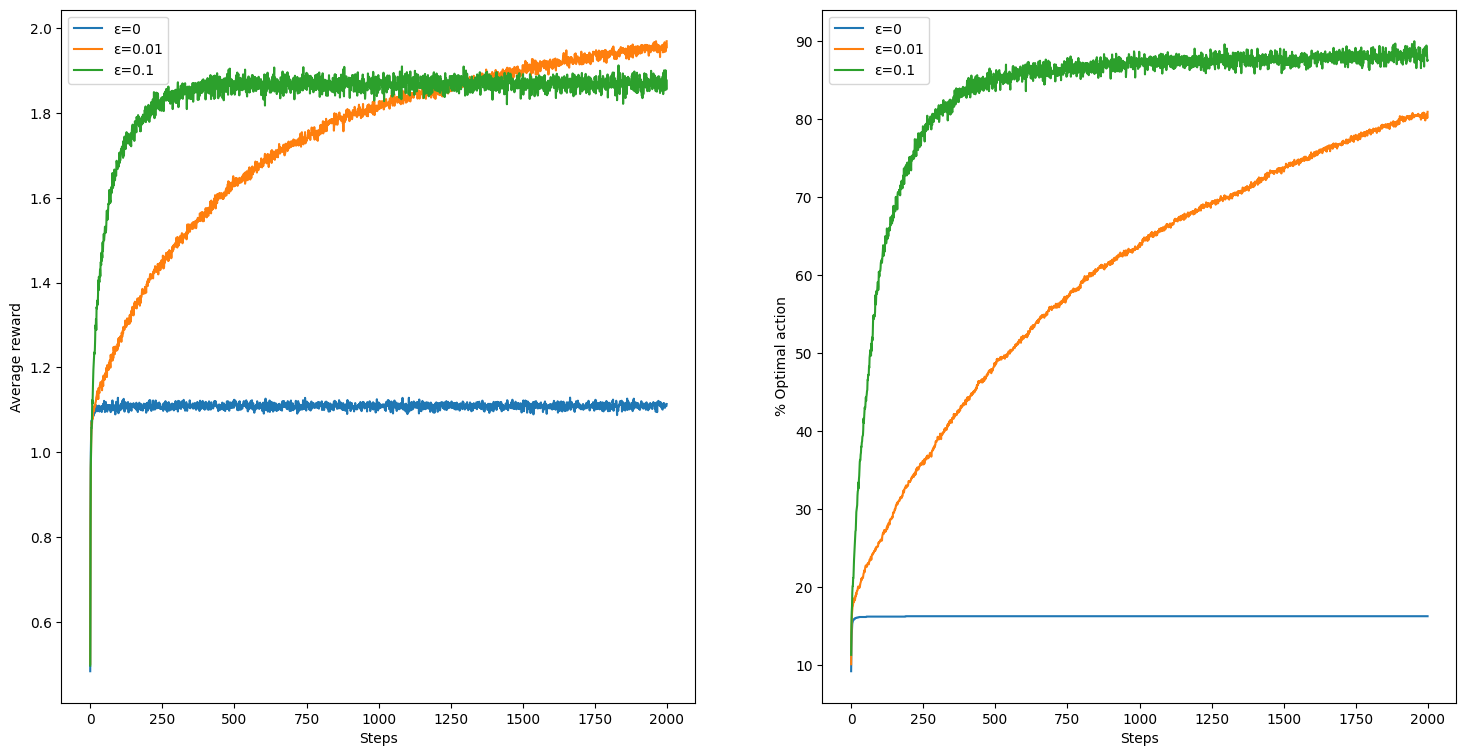

In [70]:
plt.figure(figsize=(18, 9))

# Pre-store results
results = {}
for eps in epsilons:
    avg_rewards, optimal_actions = simulation(eps)
    results[eps] = (avg_rewards, optimal_actions)

# Average reward
plt.subplot(1, 2, 1)
for eps, (avg_rewards, _) in results.items():
    plt.plot(avg_rewards, label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()

# % Optimal action
plt.subplot(1, 2, 2)
for eps, (_, optimal_actions) in results.items():
    plt.plot(optimal_actions, label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

plt.show()

## Non stationary rewards case

In [71]:
def non_stationary_simulation(eps, steps = STEPS, runs= RUNS, change_interval = CHANGE_INTERVAL, change_scale = CHANGE_SCALE):
    rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    for _ in range(runs):
        Q = [0] * 10
        N = [0] * 10
        q = np.random.normal(loc=0, scale=1, size=10)
        for step in range(steps):
            if step %  change_interval == 0:
                q += np.random.normal(loc=0, scale=change_scale, size=10)
            if np.random.rand() < eps:
                action = np.random.randint(10)
            else:
                action = np.argmax(Q)
            reward = q[action] + np.random.rand()
            rewards[step] += reward
            N[action] += 1
            Q[action] += (reward - Q[action])/N[action]
            optimal_actions[step] += (action == np.argmax(q))
    average_rewards = rewards / runs
    optimal_actions = 100 * optimal_actions / runs
    return average_rewards, optimal_actions

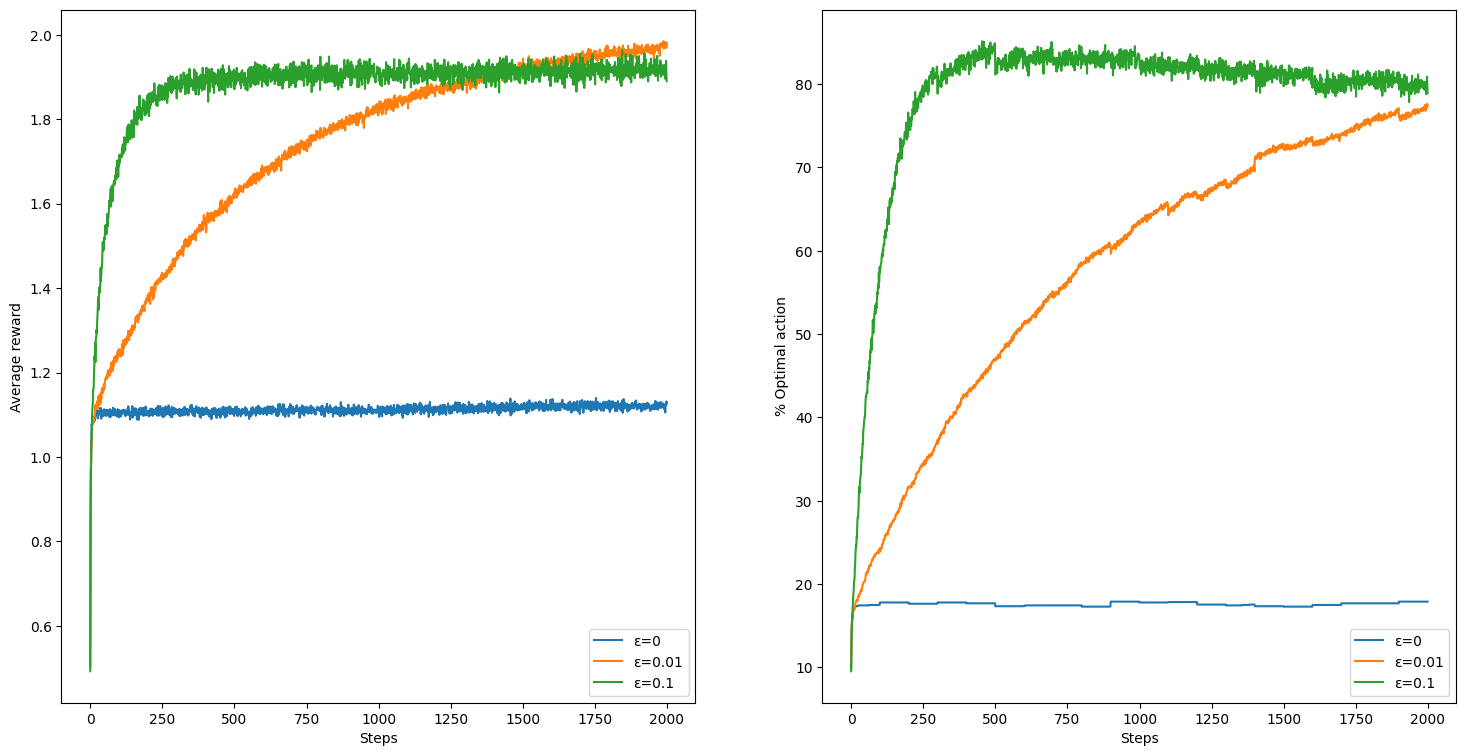

In [72]:
plt.figure(figsize=(18, 9))

# Pre-store results
results = {}
for eps in epsilons:
    avg_rewards, optimal_actions = non_stationary_simulation(eps)
    results[eps] = (avg_rewards, optimal_actions)

# Average reward
plt.subplot(1, 2, 1)
for eps, (avg_rewards, _) in results.items():
    plt.plot(avg_rewards, label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()

# % Optimal action
plt.subplot(1, 2, 2)
for eps, (_, optimal_actions) in results.items():
    plt.plot(optimal_actions, label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

plt.show()

In [76]:
def non_stationary_simulation(eps, alpha=ALPHA, steps = STEPS, runs= RUNS, change_interval = CHANGE_INTERVAL, change_scale = CHANGE_SCALE):
    rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    for _ in range(runs):
        Q = [0] * 10
        N = [0] * 10
        q = np.random.normal(loc=0, scale=1, size=10)
        for step in range(steps):
            if step %  change_interval == 0:
                q += np.random.normal(loc=0, scale=change_scale, size=10)
            if np.random.rand() < eps:
                action = np.random.randint(10)
            else:
                action = np.argmax(Q)
            reward = q[action] + np.random.rand()
            rewards[step] += reward
            N[action] += 1
            Q[action] += (reward - Q[action]) * alpha
            optimal_actions[step] += (action == np.argmax(q))
    average_rewards = rewards / runs
    optimal_actions = 100 * optimal_actions / runs
    return average_rewards, optimal_actions

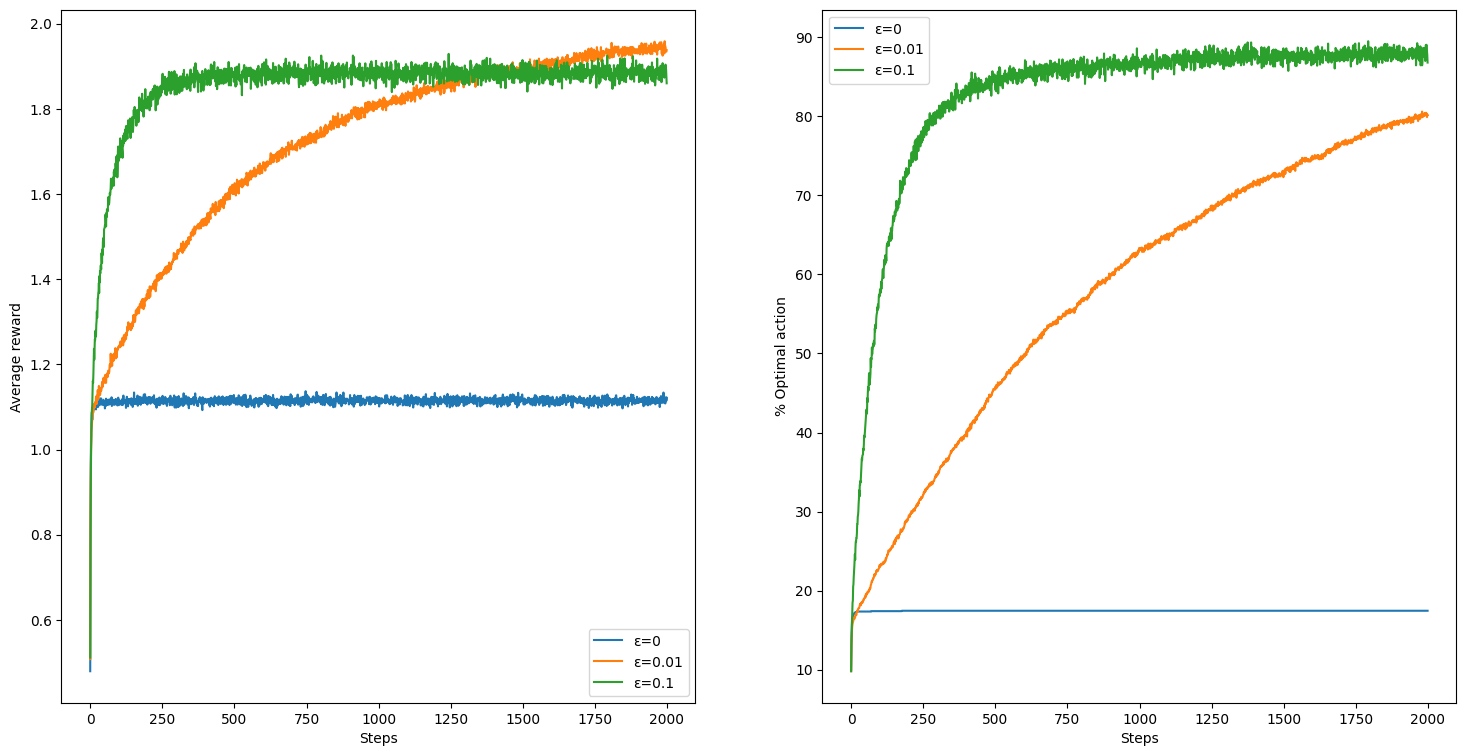

In [77]:
plt.figure(figsize=(18, 9))

# Pre-store results
results = {}
for eps in epsilons:
    avg_rewards, optimal_actions = simulation(eps)
    results[eps] = (avg_rewards, optimal_actions)

# Average reward
plt.subplot(1, 2, 1)
for eps, (avg_rewards, _) in results.items():
    plt.plot(avg_rewards, label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()

# % Optimal action
plt.subplot(1, 2, 2)
for eps, (_, optimal_actions) in results.items():
    plt.plot(optimal_actions, label=f"ε={eps}")
plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()

plt.show()